In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data=pd.read_csv("iris.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.shape

(150, 6)

In [5]:
data.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [6]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:
data = data.drop('Id', axis=1)
X= data.drop('Species', axis=1)
y = data['Species']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

clf.fit(X_train, y_train)


MLPClassifier(max_iter=1000, random_state=42)

In [11]:
prediction = clf.predict(X_test)
print("Predicted labels:")
print(prediction)
print("Actual labels:")
print(y_test)

Predicted labels:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual labels:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [12]:
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print(f'Training Accuracy: {train_accuracy:.2f}')


Training Accuracy: 0.98


In [13]:
test_accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f'Test Accuracy: {test_accuracy:.2f}')


Test Accuracy: 1.00


In [14]:
#new_data_point = [[22,500.1,3.7,1.5]] 
new_data_point = [[5.3431, 3123.5, 130.4, 5000.2]]
predicted_class = le.inverse_transform(clf.predict(new_data_point))
print(f'Predicted Class for New Data: {predicted_class[0]}')

Predicted Class for New Data: Iris-virginica


C:\Users\ANUSHREETA\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [15]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)
confusion = confusion_matrix(y_test, y_pred)

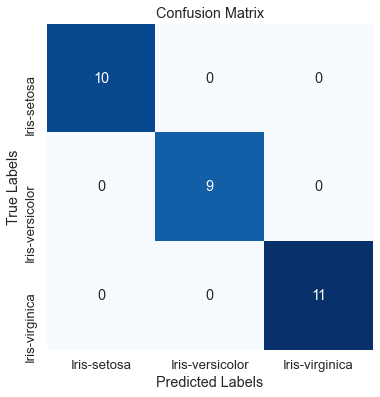

Accuracy: 1.00


In [16]:

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(f'Accuracy: {accuracy:.2f}')


In [17]:
report_lines = class_report.split('\n')

report_data = [line.split() for line in report_lines[2:-5]]  # Exclude header and footer lines
df_report = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

print("Classification Report as a Table:")
print(df_report)

Classification Report as a Table:
             Class Precision Recall F1-Score Support
0      Iris-setosa      1.00   1.00     1.00      10
1  Iris-versicolor      1.00   1.00     1.00       9
2   Iris-virginica      1.00   1.00     1.00      11


In [18]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
